In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import plotly.express as ex #for interarctive plots
import plotly.graph_objs as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

import scipy.stats as stats
from scipy.stats import chi2 #for chi-square test

from wordcloud import WordCloud

In [2]:
#loading the data
df = pd.read_csv('Bank_Churn_data.csv')
df.head()

RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         79084.10       0

In [3]:
#checking the data types of the variables
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
# descriptive statistics
df.describe()

RowNumber    CustomerId   CreditScore           Age        Tenure  \
count  10000.00000  1.000000e+04  10000.000000  10000.000000  10000.000000   
mean    5000.50000  1.569094e+07    650.528800     38.921800      5.012800   
std     2886.89568  7.193619e+04     96.653299     10.487806      2.892174   
min        1.00000  1.556570e+07    350.000000     18.000000      0.000000   
25%     2500.75000  1.562853e+07    584.000000     32.000000      3.000000   
50%     5000.50000  1.569074e+07    652.000000     37.000000      5.000000   
75%     7500.25000  1.575323e+07    718.000000     44.000000      7.000000   
max    10000.00000  1.581569e+07    850.000000     92.000000     10.000000   

             Balance  NumOfProducts    HasCrCard  IsActiveMember  \
count   10000.000000   10000.000000  10000.00000    10000.000000   
mean    76485.889288       1.530200      0.70550        0.515100   
std     62397.405202       0.581654      0.45584        0.499797   
min         0.000000       1.000000      0.00000        0.000000   
25%         0.000000       1.000000      0.00000        0.000000   
50%     97198.540000       1.000000      1.00000        1.000000   
75%    127644.240000       2.000000      1.00000        1.000000   
max    250898.090000       4.000000      1.00000        1.000000   

       EstimatedSalary        Exited  
count     10000.000000  10000.000000  
mean     100090.239881      0.203700  
std       57510.492818      0.402769  
min          11.580000      0.000000  
25%       51002.110000      0.000000  
50%      100193.915000      0.000000  
75%      149388.247500      0.000000  
max      199992.480000      1.000000

In [5]:
#checking for missing values
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#### univariate analysis

([<matplotlib.patches.Wedge at 0x279013742e0>,
 [Text(-0.8823431426537007, 0.6568642010431011, '0'),
  Text(0.8823431426537006, -0.6568642010431012, '1')],
 [Text(-0.48127807781110943, 0.3582895642053278, '80%'),
  Text(0.4812780778111093, -0.35828956420532787, '20%')])

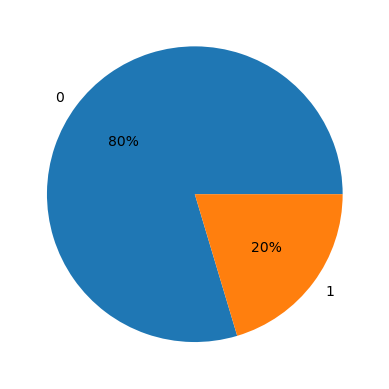

In [6]:
#1. Target variable
plt.pie(x= df['Exited'].value_counts().values, labels= df['Exited'].value_counts().index ,autopct= '%.0f%%')

([<matplotlib.patches.Wedge at 0x2790141af40>,
 [Text(-0.8823431426537007, 0.6568642010431011, 'Not Exited'),
  Text(0.8823431426537006, -0.6568642010431012, 'Exited')],
 [Text(-0.48127807781110943, 0.3582895642053278, '79.6%'),
  Text(0.4812780778111093, -0.35828956420532787, '20.4%')])

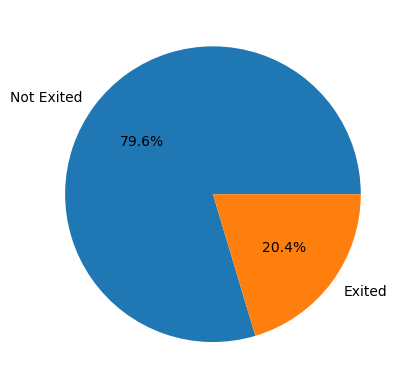

In [7]:
plt.pie(x= df['Exited'].value_counts().values, labels= ['Not Exited', 'Exited'] ,autopct= '%.1f%%')

2037 out of 10000 customers exit

In [8]:
#2. Age

fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['Age'],name='Age Box Plot',boxmean=True)
tr2=go.Histogram(x=df['Age'],name='Age Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Customer Ages")
fig.show()

C:\Users\govin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='Age', ylabel='Density'>

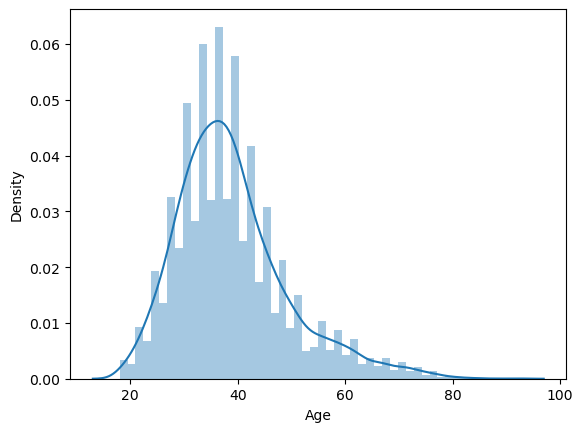

In [9]:
sns.distplot(df['Age'], kde= True)

In [10]:
ex.box(df['Age'], points= 'all', labels= 'Age in years')

Age variable is normally distributed and it is right skewed

In [11]:
# #3. Gender
# counts = df.groupby(['Gender', 'Exited']).size().unstack(fill_value=0)

# percentage_exited = counts[1] / (counts[0] + counts[1]) * 100

# # Plot the stacked bar chart
# counts.plot(kind='bar', stacked=True)
# plt.xlabel('Age group in years')
# plt.ylabel('Num of Customers')

# # Plot the percentage values on top of the bars
# for i, val in enumerate(percentage_exited):
#     plt.text(i, sum(counts.iloc[i]), f'{val:.1f}%', ha='center', va='bottom')

# plt.show()

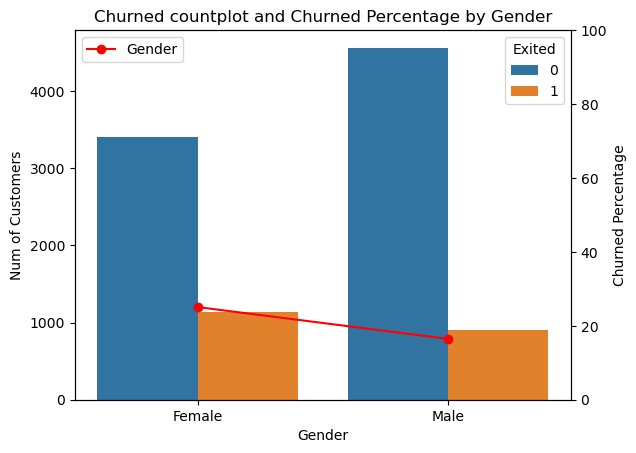

In [12]:
fig, ax1 = plt.subplots()
sns.countplot(data=df, x='Gender', hue='Exited', ax=ax1)
plt.title('Churned countplot and Churned Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Num of Customers')

# Calculate percentage of churned customers by gender
total_counts = df['Gender'].value_counts()
churned_counts = df[df['Exited'] == 1]['Gender'].value_counts()
churned_percentage = (churned_counts / total_counts) * 100

# Plot the line chart on the secondary y-axis
ax2 = ax1.twinx()
churned_percentage.plot(marker='o', ax=ax2, color='r')
ax2.set_ylabel('Churned Percentage')
ax2.set_ylim(0, 100)

# Add legend for the line chart
lines, labels = ax2.get_legend_handles_labels()
labels.append('Churned Percentage')
ax2.legend(lines, labels, loc='upper left')

# Show the plot
plt.show()

In [13]:
fig, ax1 = plt.subplots()
sns.countplot(data=df, x='Gender', hue='Exited', ax=ax1)
plt.title('Churned countplot and Churned Percentage by Gender')
plt.xlabel('Gender')
plt.ylabel('Num of Customers')

# Calculate percentage of churned customers by gender
total_counts = df['Gender'].value_counts()
churned_counts = df[df['Exited'] == 1]['Gender'].value_counts()
churned_percentage = (churned_counts / total_counts) * 100

# Plot the line chart on the secondary y-axis
ax2 = ax1.twinx()
line_plot = churned_percentage.plot(marker='o', ax=ax2, color='r')
ax2.set_ylabel('Churned Percentage')
ax2.set_ylim(0, 100)

# Add labels to the line plot
for x, y in zip(churned_percentage.index, churned_percentage.values):
    ax2.text(x, y, f'{y:.2f}%', ha='center', va='bottom', fontsize=9)

# Add legend for the line chart
lines, labels = ax2.get_legend_handles_labels()
labels.append('Churned Percentage')
ax2.legend(lines, labels, loc='upper left')

# Show the plot
plt.show()

ConversionError: Failed to convert value(s) to axis units: 'Female'

<Figure size 640x480 with 2 Axes>

There are more male customers (54.57%) than females (45.43%)

C:\Users\govin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Number of Customers')

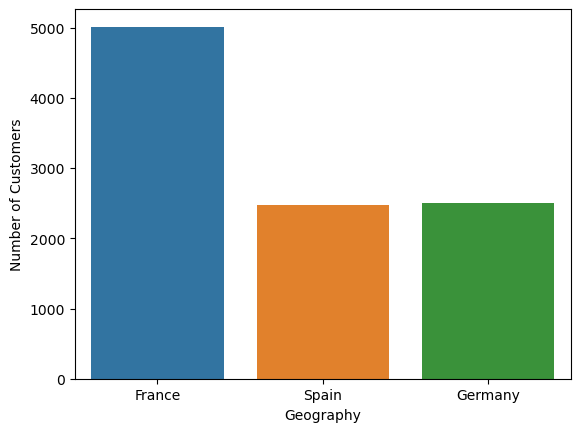

In [14]:
#4. Geography

sns.countplot(df['Geography'])
plt.ylabel("Number of Customers")

France has the most number of customers while Spain and Germany are almost equal. 

In [15]:
df['Geography'].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

Text(0.5, 0, 'Tenure in years')

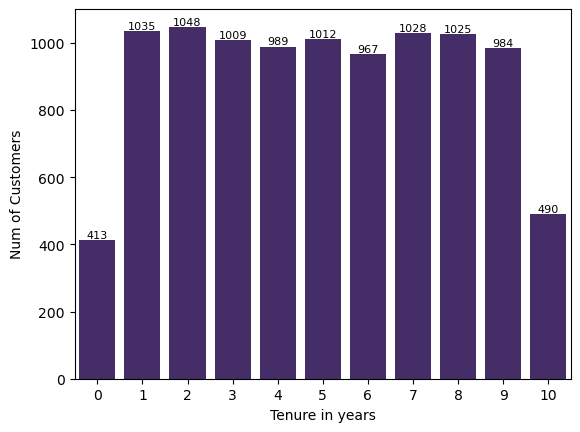

In [16]:
#4. Tenure
ax = sns.countplot(x= 'Tenure', data= df, color= '#432371')

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)

plt.ylabel("Num of Customers")
plt.xlabel('Tenure in years')

We can see that most customers are having tenure of 2 years. It is a good sign that 91% of the customers are having 1-9 years of tenure with the bank

In [17]:
#5. CreditScore

fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['CreditScore'],name='Credit Score Box Plot',boxmean=True)
tr2=go.Histogram(x=df['CreditScore'],name='Credit Score histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Customer Credit Score")
fig.show()

In [18]:
#6. Balance
fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['Balance'],name='Balance Box Plot',boxmean=True)
tr2=go.Histogram(x=df['Balance'],name='Balance Histogram')

fig.add_trace(tr1,row=1,col=1)
fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Customer Balances")
fig.show()

C:\Users\govin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



Text(0.5, 0, 'Credit Score')

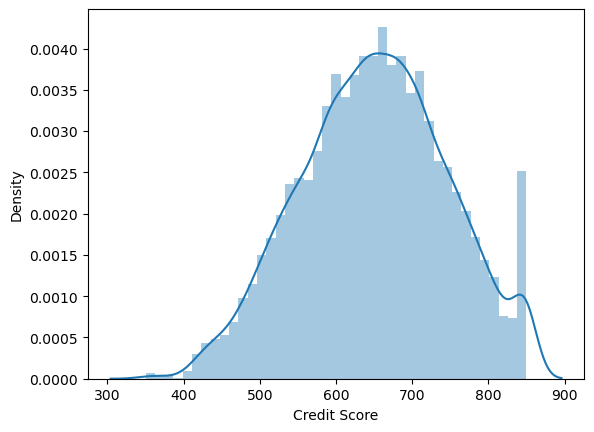

In [19]:
sns.distplot(df['CreditScore'], kde= True)
plt.xlabel('Credit Score')

C:\Users\govin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Num of Customers')

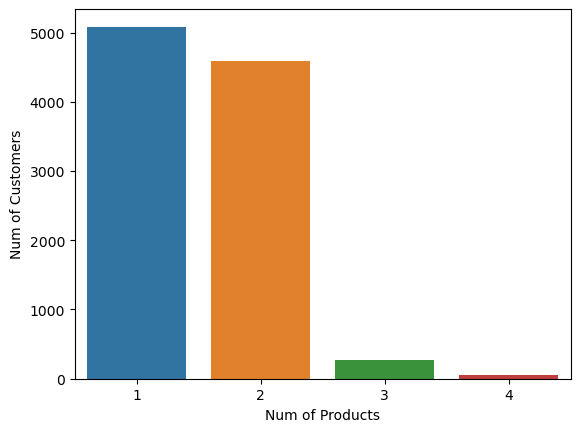

In [20]:
#7. Num of Products

sns.countplot(df['NumOfProducts'])
plt.xlabel('Num of Products')
plt.ylabel("Num of Customers")

In [21]:
df['NumOfProducts'].value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

([<matplotlib.patches.Wedge at 0x2790388f4c0>,
 [Text(-0.02902502641784059, 1.0996170005240204, '1'),
  Text(-0.08354852761942431, -1.0968225214375509, '2'),
  Text(1.091921994594931, -0.1330652385855436, '3'),
  Text(1.0998045894353543, -0.02073318733170808, '4')],
 [Text(-0.01583183259154941, 0.5997910911949202, '51%'),
  Text(-0.04557192415604962, -0.5982668298750277, '46%'),
  Text(0.5955938152335987, -0.0725810392284783, '3%'),
  Text(0.5998934124192842, -0.01130901127184077, '1%')])

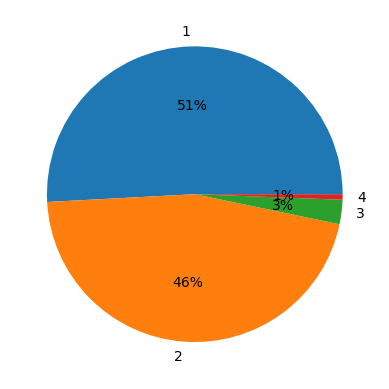

In [22]:
plt.pie(x= df['NumOfProducts'].value_counts().values, labels= df['NumOfProducts'].value_counts().index ,autopct= '%.0f%%')

97% of customers have signed up for 1 or 2 products of the bank.

C:\Users\govin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



Text(0, 0.5, 'Num of Customers')

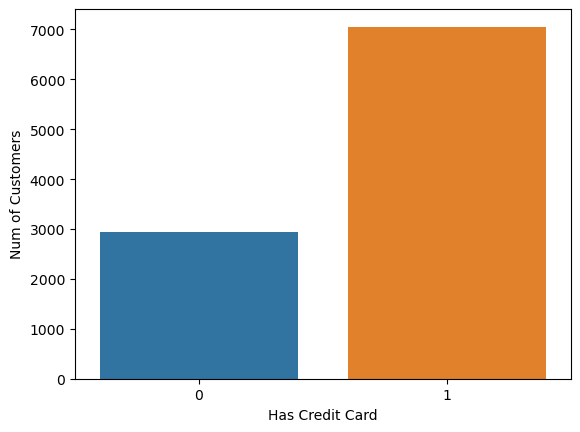

In [23]:
#8. HasCrCard

sns.countplot(df['HasCrCard'])
plt.xlabel('Has Credit Card')
plt.ylabel('Num of Customers')

70.55% of the customers have taken a credit card from the bank

([<matplotlib.patches.Wedge at 0x2790373ddc0>,
 [Text(-0.05216229267876963, 1.0987625290400536, 'Yes'),
  Text(0.05216229267876925, -1.0987625290400536, 'No')],
 [Text(-0.028452159642965248, 0.5993250158400292, '52%'),
  Text(0.02845215964296504, -0.5993250158400292, '48%')])

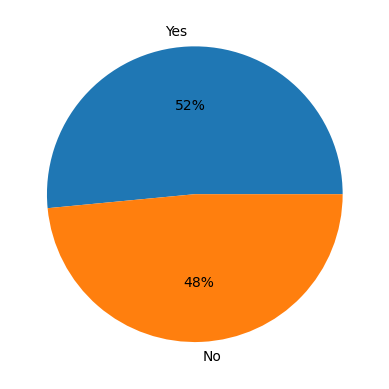

In [24]:
#9. IsActiveMember

# plt.pie(x = df['IsActiveMember'].value_counts().values, labels= df['IsActiveMember'].value_counts().index, autopct= '%.0f%%')
plt.pie(x = df['IsActiveMember'].value_counts().values, labels= ['Yes', 'No'], autopct= '%.0f%%')


52% of customers are active members of the bank

In [25]:
#9. Estimated Salary

fig = make_subplots(rows=2, cols=1)

tr1=go.Box(x=df['EstimatedSalary'],name='Estimated Salary Box Plot',boxmean=True)
# tr2=go.Histogram(x=df['EstimatedSalary'],name='Estimated Salary Histogram')

fig.add_trace(tr1,row=1,col=1)
# fig.add_trace(tr2,row=2,col=1)

fig.update_layout(height=700, width=1200, title_text="Distribution of Customer Estimated Salary")
fig.show()

C:\Users\govin\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



<AxesSubplot:xlabel='EstimatedSalary', ylabel='Density'>

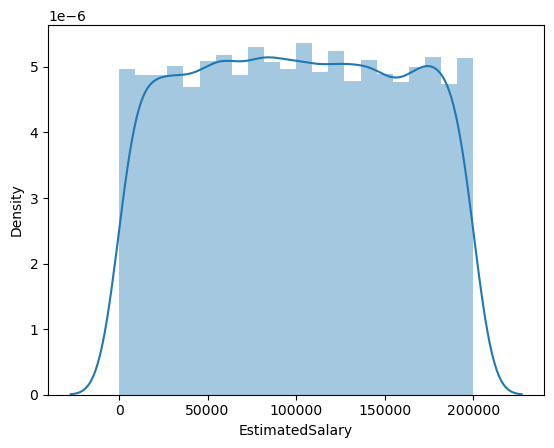

In [26]:
sns.distplot(df['EstimatedSalary'], kde= True)

In [27]:
df['Tenure'].value_counts()

2     1048
1     1035
7     1028
8     1025
5     1012
3     1009
4      989
9      984
6      967
10     490
0      413
Name: Tenure, dtype: int64

<AxesSubplot:>

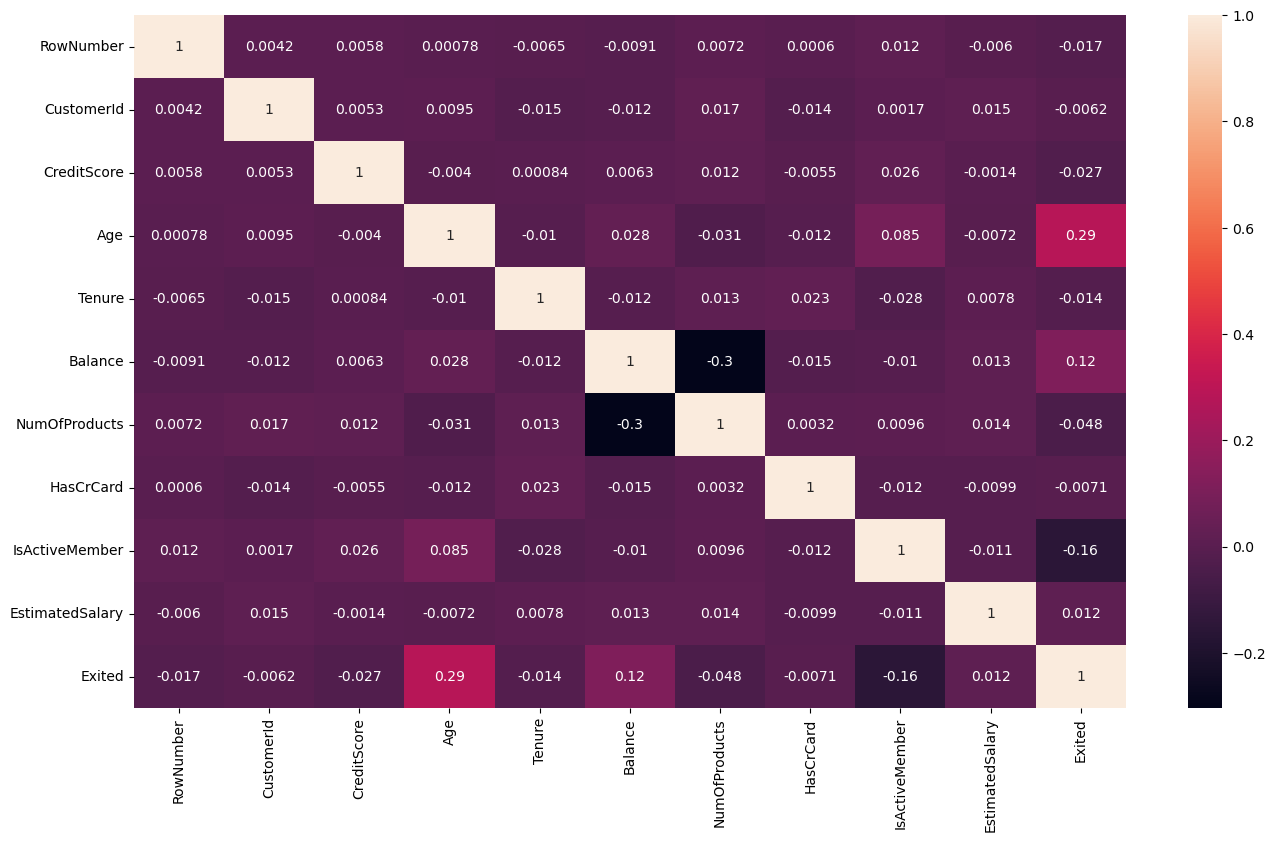

In [28]:
plt.figure(figsize= (16,9))
sns.heatmap(df.corr(),annot = True)

In [29]:
#Bivariate analysis

<AxesSubplot:xlabel='Exited', ylabel='count'>

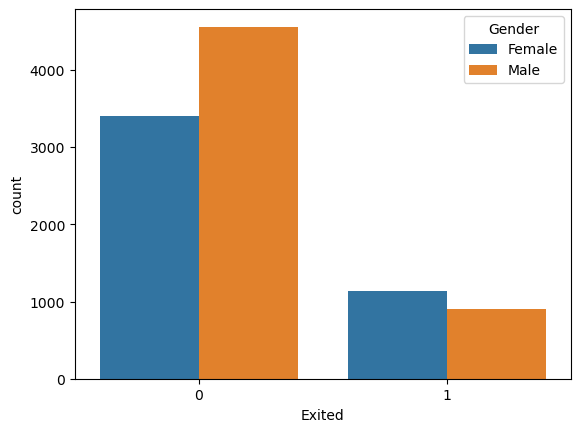

In [30]:
sns.countplot(x= 'Exited', hue = 'Gender', data= df)

<AxesSubplot:xlabel='Geography', ylabel='count'>

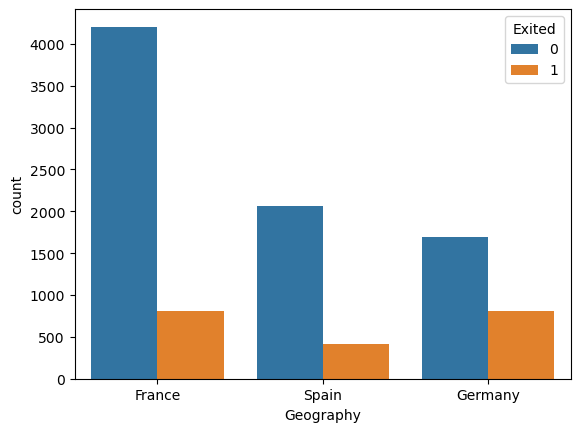

In [31]:
sns.countplot(x= 'Geography', hue= 'Exited', data= df)

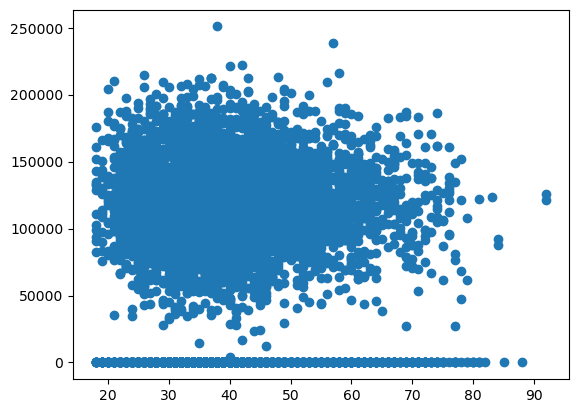

In [32]:
#Age vs Balance

plt.scatter(x= df['Age'], y= df['Balance'])
plt.show()

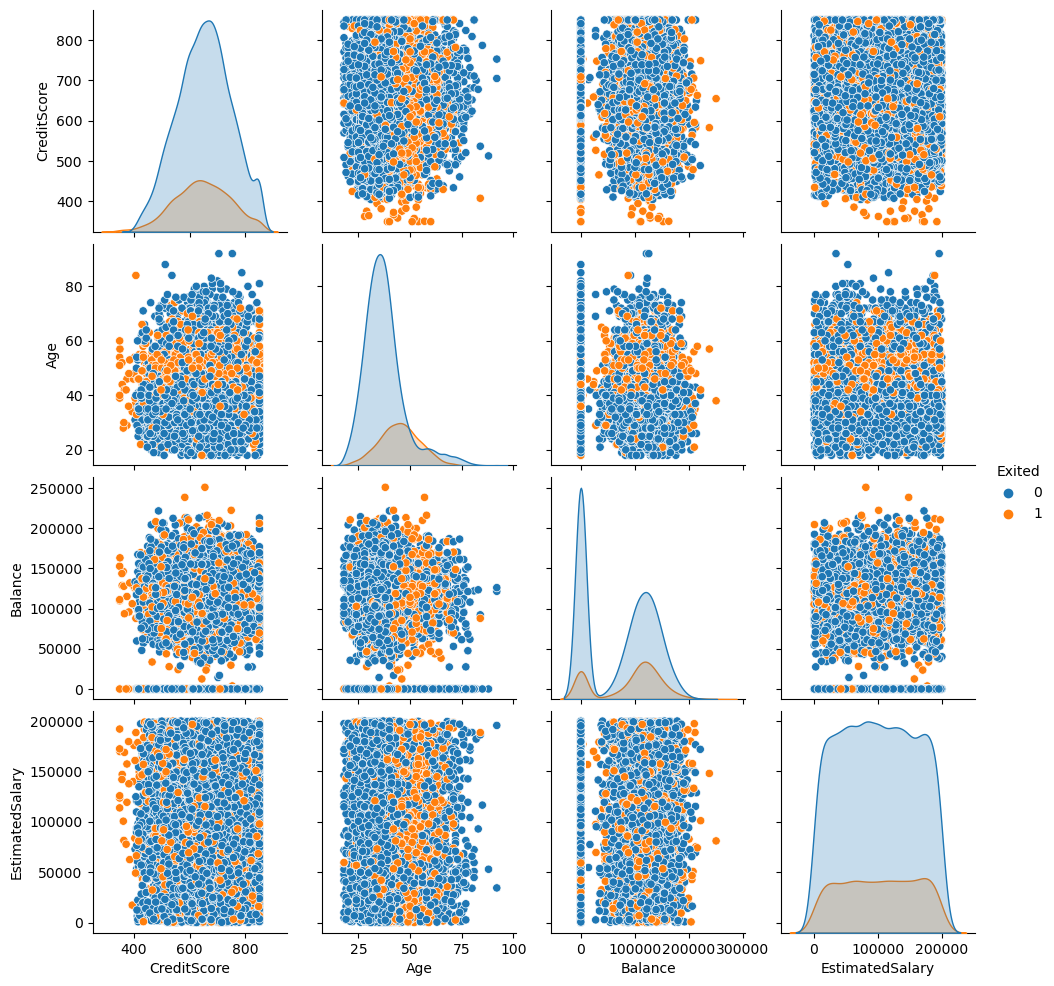

In [33]:
sns.pairplot(df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Exited']], hue='Exited')
plt.show()

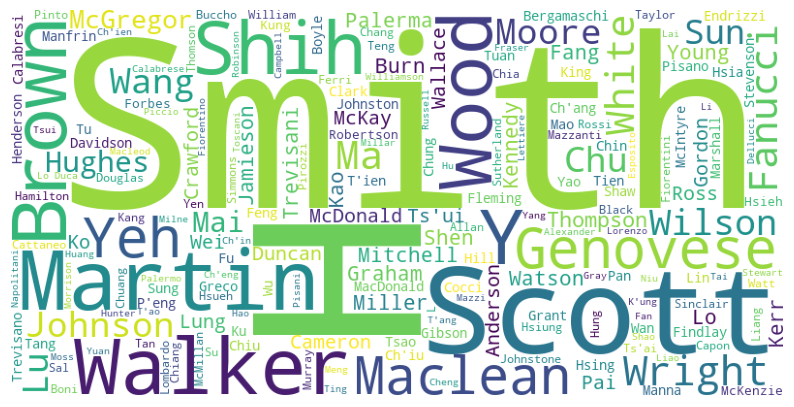

In [34]:
#wordcloud for surnames
surname_values = df['Surname'].values
text = ' '.join(surname_values)

wordcloud = WordCloud(width=800, height=400, max_words=200, background_color='white').generate(text)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<AxesSubplot:xlabel='Tenure'>

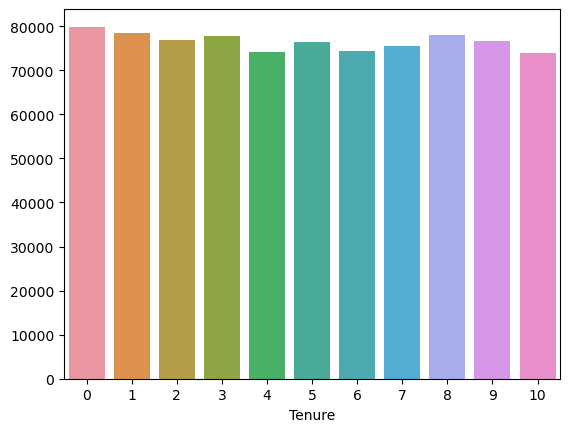

In [35]:
sns.barplot(x = df.groupby('Tenure')['Balance'].mean().index, y = df.groupby('Tenure')['Balance'].mean().values)
# df.groupby('Tenure')['Balance'].mean().sort_values(ascending= False).index

In [36]:
df.groupby('Exited')['Balance'].mean()

Exited
0    72745.296779
1    91108.539337
Name: Balance, dtype: float64

<AxesSubplot:xlabel='Exited'>

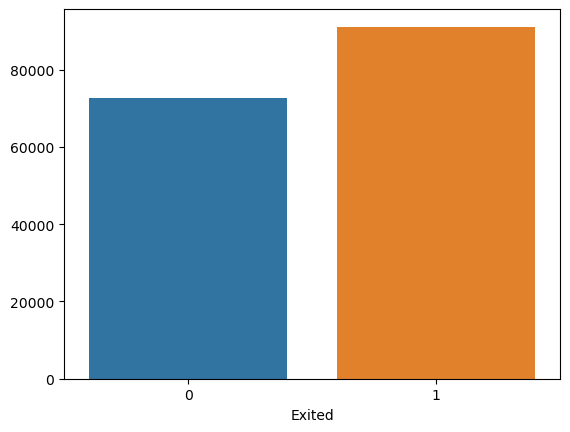

In [37]:
sns.barplot(x= df.groupby('Exited')['Balance'].mean().index, y= df.groupby('Exited')['Balance'].mean().values)

The customer who have churned are having higher balance than the retained customers on an average

In [38]:
df.groupby('Exited')['EstimatedSalary'].mean()

Exited
0     99738.391772
1    101465.677531
Name: EstimatedSalary, dtype: float64

<AxesSubplot:xlabel='Exited'>

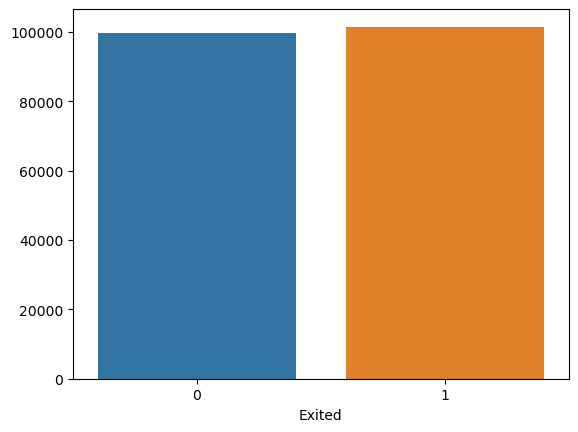

In [39]:
sns.barplot(x= df.groupby('Exited')['EstimatedSalary'].mean().index, y= df.groupby('Exited')['EstimatedSalary'].mean().values)

<AxesSubplot:xlabel='Age', ylabel='Balance'>

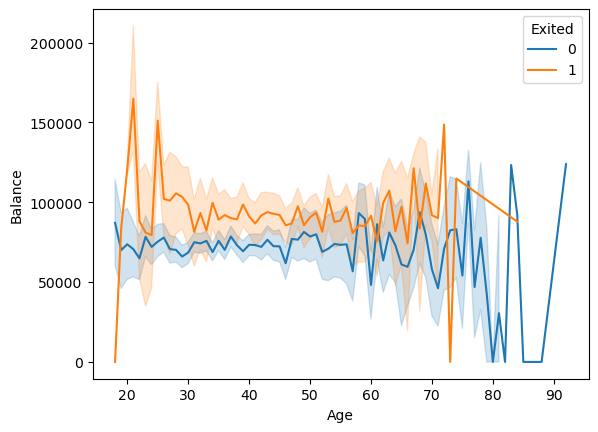

In [40]:
sns.lineplot(x= 'Age', y= 'Balance' ,hue= 'Exited', data = df)

Customers with higher balance are the ones exiting.

In [41]:
# Create a new column 'AgeGroup' by grouping the 'Age' column

age_bins = [20, 40, 60, 80, 100]
age_labels = ['20-40', '41-60', '61-80', '81-100']


df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels, right=False)

In [42]:
# Print the counts of customers in each age group
age_group_counts = df['AgeGroup'].value_counts().sort_index()
print(age_group_counts)

20-40     5938
41-60     3487
61-80      511
81-100      15
Name: AgeGroup, dtype: int64


C:\Users\govin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

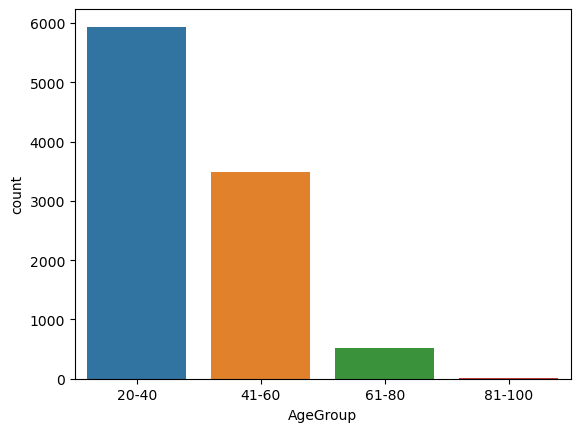

In [43]:
sns.countplot(df['AgeGroup'])

#### Bivariate Analysis

In [44]:
#1. Age group vs Exited
# sns.countplot(x = 'AgeGroup', hue = 'Exited', data= df)
# plt.ylabel('Num of Customers')
# plt.xlabel('Age group in years')

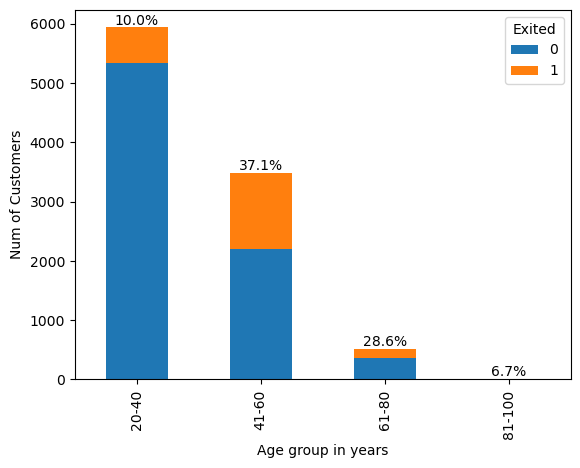

In [45]:
counts = df.groupby(['AgeGroup', 'Exited']).size().unstack(fill_value=0)


percentage_exited = counts[1] / (counts[0] + counts[1]) * 100

# Plot the stacked bar chart
counts.plot(kind='bar', stacked=True)
plt.xlabel('Age group in years')
plt.ylabel('Num of Customers')

# Plot the percentage values on top of the bars
for i, val in enumerate(percentage_exited):
    plt.text(i, sum(counts.iloc[i]), f'{val:.1f}%', ha='center', va='bottom')

plt.show()

Customers in the age group of 51-60 years exit more. This is worrisome for the bank and thus action should be taken to counter this

In [46]:
age_exit = pd.DataFrame(df.pivot_table(index='AgeGroup', columns='Exited', aggfunc='size', fill_value=0))
age_exit['Percentage_Exited'] = np.round((age_exit[1] / ((age_exit[0]) + age_exit[1])) * 100,2)
age_exit.columns = ['No', 'Yes', 'Percentage_exited']
age_exit

No   Yes  Percentage_exited
AgeGroup                               
20-40     5344   594              10.00
41-60     2194  1293              37.08
61-80      365   146              28.57
81-100      14     1               6.67

Text(0, 0.5, 'Estimated Salary (in $)')

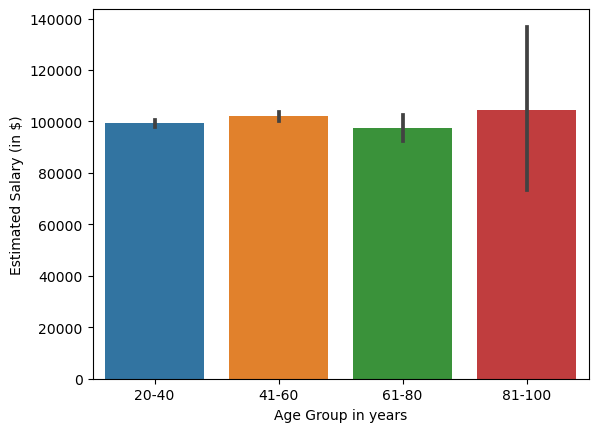

In [47]:
#2. Age group vs Estimated Salary
sns.barplot(x = 'AgeGroup', y = 'EstimatedSalary', data= df)
plt.xlabel('Age Group in years')
plt.ylabel('Estimated Salary (in $)')

age group 41-50 has the highest estimated salary after the age group 91-100. But in 91-100 age group, there are only 2 customers and thus it has higher standard deviation represented by whisker.

Text(0, 0.5, 'Balance (in $)')

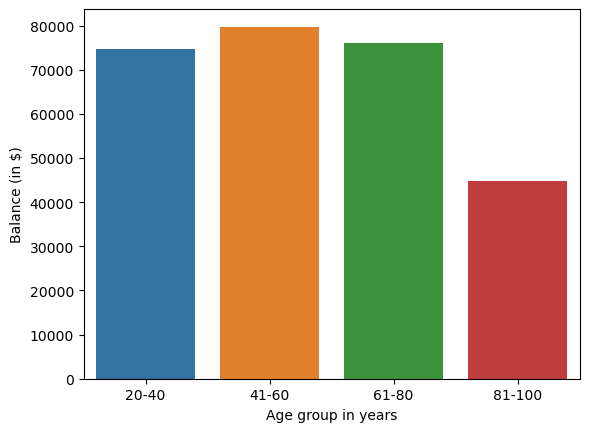

In [48]:
sns.barplot(x= df.groupby('AgeGroup')['Balance'].mean().index, y = df.groupby('AgeGroup')['Balance'].mean().values)
plt.xlabel('Age group in years')
plt.ylabel('Balance (in $)')

Customers in the age group 51-60 years are exiting the most. This is worrisome because customers in the age group 51-60 years have the highest balance in the bank 

In [49]:
#3. Num of products vs Exited

In [50]:
df.pivot_table(index='NumOfProducts', columns='Exited', aggfunc='size', fill_value=0)

Exited            0     1
NumOfProducts            
1              3675  1409
2              4242   348
3                46   220
4                 0    60

Text(0.5, 0, 'Num of products signed up by customers')

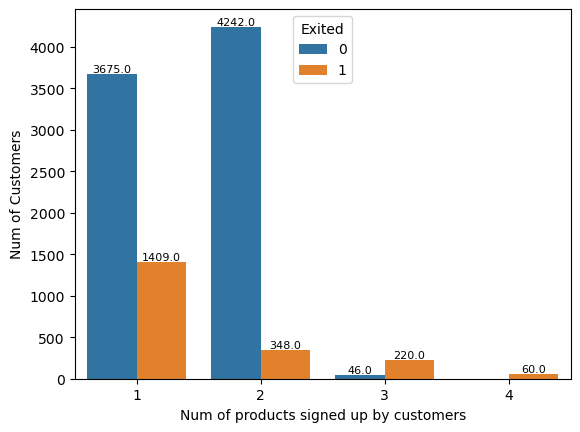

In [51]:
ax = sns.countplot(x= 'NumOfProducts', hue= 'Exited', data= df)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=8)

plt.ylabel("Num of Customers")
plt.xlabel('Num of products signed up by customers')

In [52]:
contingency_table = pd.crosstab(df['NumOfProducts'], df['Exited'])
chi2, p_val, _, _ = stats.chi2_contingency(contingency_table)

print(f"chi-Square test p- value: {p_val}")

chi-Square test p- value: 0.0


Customers who sign up for bank's 3 products end up exiting more

Text(0, 0.5, 'Num of Customers')

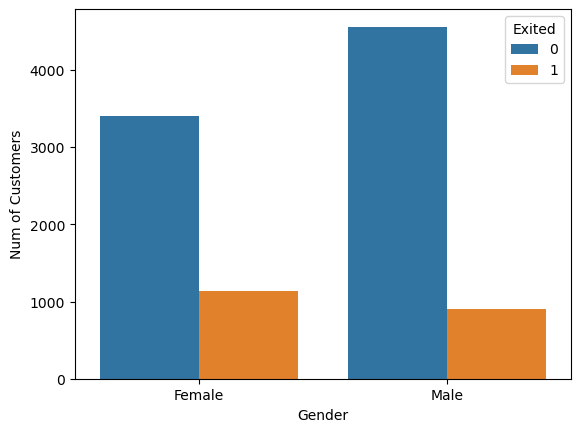

In [53]:
#4. Gender vs Exited

#hypothesis: Due to 
sns.countplot(x= 'Gender', hue= 'Exited', data= df)
plt.ylabel('Num of Customers')

Higher percentage of females exit than that of males.

In [54]:
#5. Gender vs Num of Products

Text(0, 0.5, 'Num of customers')

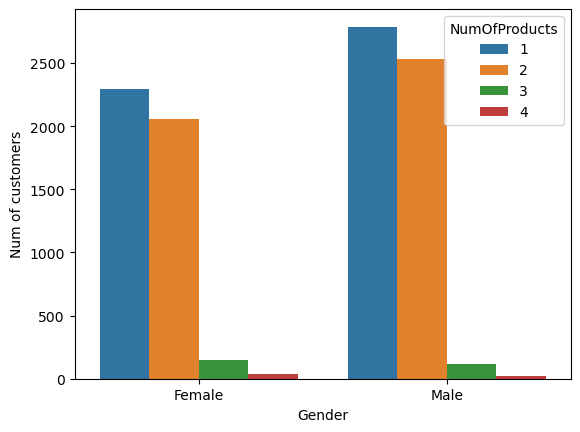

In [55]:
sns.countplot(x= 'Gender', hue= 'NumOfProducts', data= df)
plt.ylabel("Num of customers")

More number of females sign up for 4 products than that of males

In [56]:
#6. Geography vs Exited

In [57]:
geog_exit = pd.DataFrame(df.pivot_table(index='Geography', columns= 'Exited', aggfunc='size', fill_value=0))
geog_exit['Total_customers'] = geog_exit[0] + geog_exit[1]
geog_exit['Percentage_Exited'] = (geog_exit[1] / geog_exit['Total_customers']) * 100
geog_exit.columns= ['No', 'Yes', 'Total_customer', 'Percentage_exited']
geog_exit

No  Yes  Total_customer  Percentage_exited
Geography                                              
France     4204  810            5014          16.154767
Germany    1695  814            2509          32.443204
Spain      2064  413            2477          16.673395

32.4% of the customers from Germany exit

In [58]:
#7. Age Group vs Geography

<AxesSubplot:xlabel='AgeGroup', ylabel='count'>

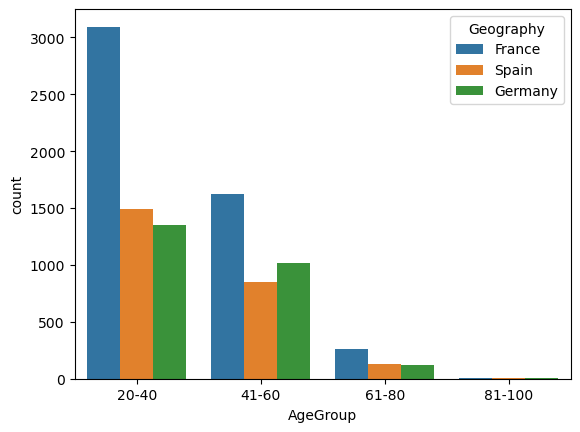

In [59]:
sns.countplot(x= 'AgeGroup', hue= 'Geography', data= df)

In [60]:
#8. Active customer vs Exited

#hypothesis: Customers who exit would be non-active

active_exit = pd.DataFrame(df.pivot_table(index='IsActiveMember', columns='Exited', aggfunc='size', fill_value=0))
active_exit['Percentage_exited'] = np.round((active_exit[1] / ((active_exit[0]) + active_exit[1])) * 100,2)
active_exit.columns = ['No', 'Yes', 'Percentage_exited']
active_exit = active_exit.rename(index= {0: 'No', 1: 'Yes'})
active_exit

No   Yes  Percentage_exited
IsActiveMember                               
No              3547  1302              26.85
Yes             4416   735              14.27

In [61]:
contingency_table = pd.crosstab(df['IsActiveMember'], df['Exited'])
chi2, p_val, _, _ = stats.chi2_contingency(contingency_table)

print(f"chi-Square test p- value: {p_val}")

chi-Square test p- value: 8.785858269303703e-55


Higher percentage of non active customers exit. Hypothesis is justified

In [62]:
#9. Active customer vs Balance & EstimatedSalary

#Hypothesis: Active customers will have higher balance in the bank and higher estimated salary

df.groupby('IsActiveMember')[['Balance','EstimatedSalary']].mean()

Balance  EstimatedSalary
IsActiveMember                               
0               77134.376863    100767.203854
1               75875.422145     99452.965894

On an average, balance and estimated salary of the active customers are lower than the non-active customers. Hypothesis is wrong

In [63]:
#10. Tenure and Exited

#hypothesis: Customers who go for lesser tenure exit than those with higher tenure.
# this is because if they are not reaping the benefits at the starting of the tenure, they do not make long term commitments.
ten_exit = df.pivot_table(index='Tenure', columns='Exited', aggfunc='size', fill_value=0)
ten_exit['Percentage_Exited'] = (ten_exit[1] / (ten_exit[0] + ten_exit[1])) * 100
ten_exit.columns = ['No', 'Yes', 'Percentage_exited']
ten_exit

No  Yes  Percentage_exited
Tenure                             
0       318   95          23.002421
1       803  232          22.415459
2       847  201          19.179389
3       796  213          21.110010
4       786  203          20.525784
5       803  209          20.652174
6       771  196          20.268873
7       851  177          17.217899
8       828  197          19.219512
9       771  213          21.646341
10      389  101          20.612245

Almost 20% of the customers with different years of tenure have exited.

In [64]:
print("% of customers exiting with lesser tenure : ",df[df['Tenure'] <= 5]['Exited'].sum()*100/10000)

% of customers exiting with lesser tenure :  11.53


More number of customers with lesser tenure than average tenure exit

Hypothesis justified.

In [65]:
churned = df[df['Exited'] == 1]['Tenure']
not_churned = df[df['Exited'] == 0]['Tenure']

# Perform independent t-test
t_stat, p_val = stats.ttest_ind(churned, not_churned)

# Print the p-value
print(f"T-test p-value: {p_val}")

T-test p-value: 0.16152684949473256


In [66]:
#10. Has Credit Card and Exited

#hypothesis: Customers who have credit cards will not be exiting.

cred_exit = df.pivot_table(index='HasCrCard', columns='Exited', aggfunc='size', fill_value=0)
cred_exit['Percentage_Exited'] = (cred_exit[1] / (cred_exit[0] + cred_exit[1])) * 100
cred_exit.columns = ['No', 'Yes', 'Percentage_exited']
cred_exit = cred_exit.rename(index= {0: 'No', 1: 'Yes'})
cred_exit

No   Yes  Percentage_exited
HasCrCard                               
No         2332   613          20.814941
Yes        5631  1424          20.184266

In [67]:
contingency_table = pd.crosstab(df['HasCrCard'], df['Exited'])
chi2, p_val, _, _ = stats.chi2_contingency(contingency_table)

print(f"chi-Square test p- value: {p_val}")

chi-Square test p- value: 0.49237236141554686


Although the hypothesis is justified, but there is only marginal decrese in the customers with credit card and are exiting. This isllustrates that the bank's credit card programme is not able to hold the customers as it would have liked.

In [68]:
#11. Estimated Salary vs Exited

#creating new feature: salary group
salary_bins = [0, 25000, 50000, 75000, 100000, 125000, 150000, 175000, 200000]
salary_labels = ['0-25000', '25000-50000', '50000-75000', '75000-100000', '100000-125000', '125000-150000', '150000-175000', '175000-200000']


df['SalaryGroup'] = pd.cut(df['EstimatedSalary'], bins=salary_bins, labels=salary_labels, right=False)

In [69]:
# Print the counts of customers in each salary group
salary_group_counts = df['SalaryGroup'].value_counts().sort_index()
print(salary_group_counts)

0-25000          1217
25000-50000      1236
50000-75000      1269
75000-100000     1268
100000-125000    1276
125000-150000    1279
150000-175000    1195
175000-200000    1260
Name: SalaryGroup, dtype: int64


Alomost uniform distribution of customers' salaries across the groups

In [70]:
#hypothesis: higher salary customers will be exiting more since they can find similar or better benefits from bank's competitors

sal_exit = df.pivot_table(index='SalaryGroup', columns='Exited', aggfunc='size', fill_value=0)
sal_exit['Total'] = sal_exit[0] + sal_exit[1]
sal_exit['Percentage_Exited'] = (sal_exit[1] / (sal_exit[0] + sal_exit[1])) * 100
sal_exit.columns = ['No', 'Yes', 'Total','Percentage_exited']
sal_exit

No  Yes  Total  Percentage_exited
SalaryGroup                                       
0-25000         975  242   1217          19.884963
25000-50000     989  247   1236          19.983819
50000-75000    1003  266   1269          20.961387
75000-100000   1030  238   1268          18.769716
100000-125000  1020  256   1276          20.062696
125000-150000  1018  261   1279          20.406568
150000-175000   941  254   1195          21.255230
175000-200000   987  273   1260          21.666667

Customers in the higher salary bracket tend to exit more. Hypothesis is justified.

In [71]:
import statsmodels.api as sm
X = df['EstimatedSalary']
y = df['Exited']

X = sm.add_constant(X)

model = sm.Logit(y,X)
result = model.fit()

print(result.summary())

Optimization terminated successfully.
         Current function value: 0.505416
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Exited   No. Observations:                10000
Model:                          Logit   Df Residuals:                     9998
Method:                           MLE   Df Model:                            1
Date:                Wed, 14 Jun 2023   Pseudo R-squ.:               0.0001448
Time:                        11:34:35   Log-Likelihood:                -5054.2
converged:                       True   LL-Null:                       -5054.9
Covariance Type:            nonrobust   LLR p-value:                    0.2264
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.4159      0.050    -28.187      0.000      -1.514      -1.317
EstimatedSalar

In [72]:
# Create a new column 'CreditScoreGroup' by grouping the 'creditScore' column

credit_bins = [350, 400, 450, 500, 550, 600, 650, 700, 750, 800, 850]
credit_labels = ['350-400', '400-450', '450-500', '500-550', '550-600', '600-650', '650-700', '700-750', '750-800', '800-850']


df['CreditScoreGroup'] = pd.cut(df['CreditScore'], bins=credit_bins, labels=credit_labels, right=False)

credit_group_counts = df['CreditScoreGroup'].value_counts().sort_index()
print(credit_group_counts)

350-400      19
400-450     166
450-500     447
500-550     958
550-600    1444
600-650    1866
650-700    1952
700-750    1525
750-800     968
800-850     422
Name: CreditScoreGroup, dtype: int64


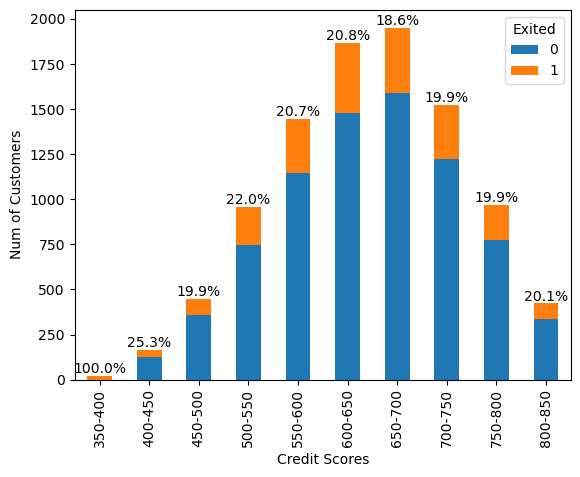

In [73]:
counts = df.groupby(['CreditScoreGroup', 'Exited']).size().unstack(fill_value=0)


percentage_exited = counts[1] / (counts[0] + counts[1]) * 100

# Plot the stacked bar chart
counts.plot(kind='bar', stacked=True)
plt.xlabel('Credit Scores')
plt.ylabel('Num of Customers')

# Plot the percentage values on top of the bars
for i, val in enumerate(percentage_exited):
    plt.text(i, sum(counts.iloc[i]), f'{val:.1f}%', ha='center', va='bottom')

plt.show()

In [74]:
dff = df[df['Gender']=='Female'][['SalaryGroup','Exited']]

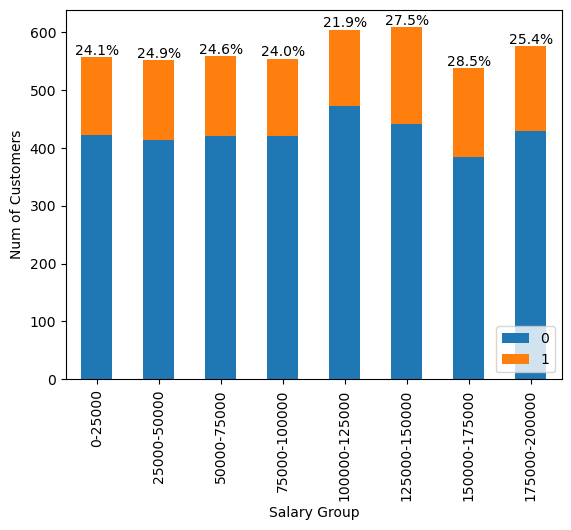

In [75]:
counts = dff.groupby(['SalaryGroup', 'Exited']).size().unstack(fill_value=0)


percentage_exited = counts[1] / (counts[0] + counts[1]) * 100

# Plot the stacked bar chart
counts.plot(kind='bar', stacked=True)
plt.xlabel('Salary Group')
plt.ylabel('Num of Customers')

# Plot the percentage values on top of the bars
for i, val in enumerate(percentage_exited):
    plt.text(i, sum(counts.iloc[i]), f'{val:.1f}%', ha='center', va='bottom')

plt.legend(loc=4)
plt.show()

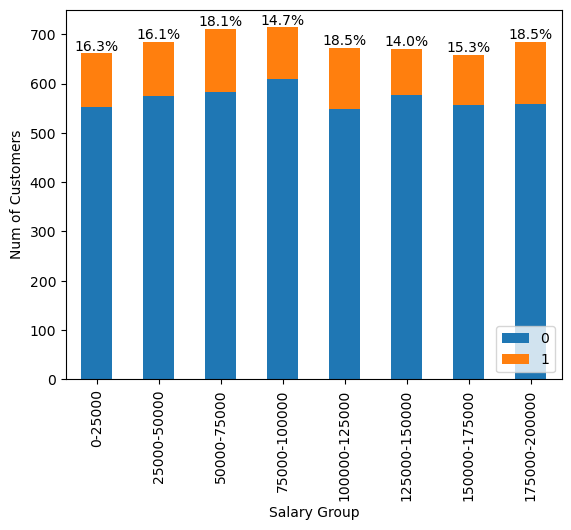

In [76]:
dfm = df[df['Gender']== 'Male'][['SalaryGroup','Exited']]

counts = dfm.groupby(['SalaryGroup', 'Exited']).size().unstack(fill_value=0)


percentage_exited = counts[1] / (counts[0] + counts[1]) * 100

# Plot the stacked bar chart
counts.plot(kind='bar', stacked=True)
plt.xlabel('Salary Group')
plt.ylabel('Num of Customers')

# Plot the percentage values on top of the bars
for i, val in enumerate(percentage_exited):
    plt.text(i, sum(counts.iloc[i]), f'{val:.1f}%', ha='center', va='bottom')

plt.legend(loc=4)
plt.show()

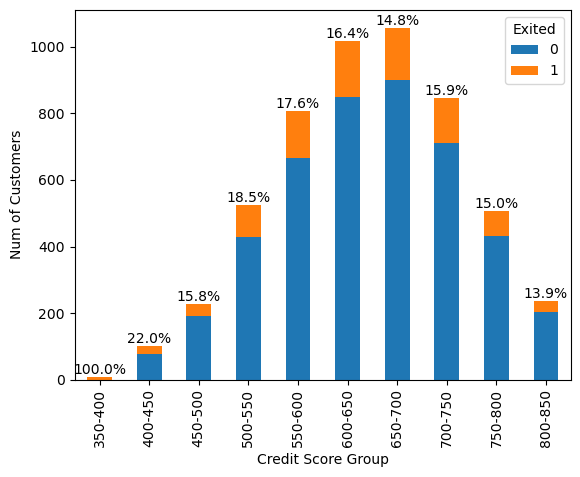

In [77]:
dfm = df[df['Gender']== 'Male'][['CreditScoreGroup','Exited']]

counts = dfm.groupby(['CreditScoreGroup', 'Exited']).size().unstack(fill_value=0)


percentage_exited = counts[1] / (counts[0] + counts[1]) * 100

# Plot the stacked bar chart
counts.plot(kind='bar', stacked=True)
plt.xlabel('Credit Score Group')
plt.ylabel('Num of Customers')

# Plot the percentage values on top of the bars
for i, val in enumerate(percentage_exited):
    plt.text(i, sum(counts.iloc[i]), f'{val:.1f}%', ha='center', va='bottom')


plt.show()

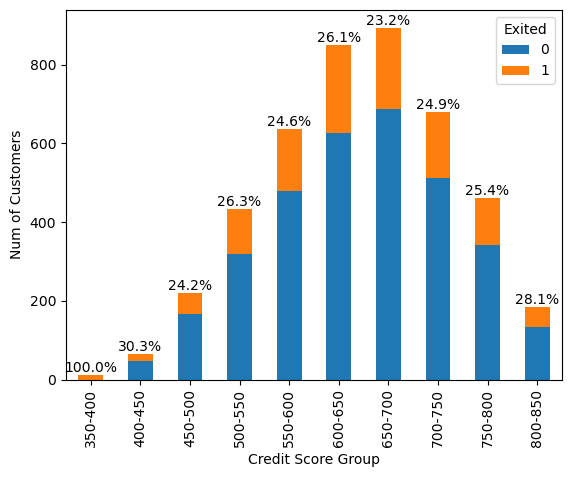

In [78]:
dff = df[df['Gender']== 'Female'][['CreditScoreGroup','Exited']]

counts = dff.groupby(['CreditScoreGroup', 'Exited']).size().unstack(fill_value=0)


percentage_exited = counts[1] / (counts[0] + counts[1]) * 100

# Plot the stacked bar chart
counts.plot(kind='bar', stacked=True)
plt.xlabel('Credit Score Group')
plt.ylabel('Num of Customers')

# Plot the percentage values on top of the bars
for i, val in enumerate(percentage_exited):
    plt.text(i, sum(counts.iloc[i]), f'{val:.1f}%', ha='center', va='bottom')


plt.show()

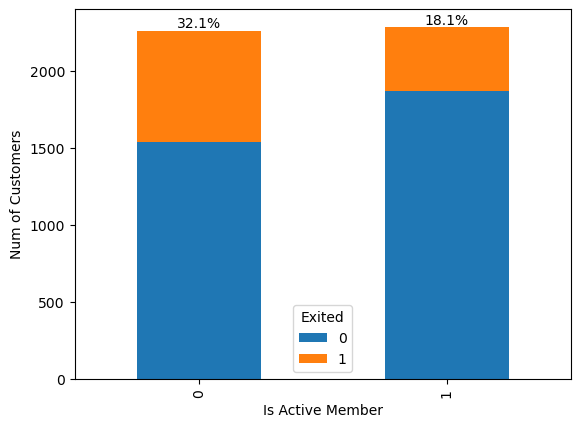

In [79]:
dff = df[df['Gender']== 'Female'][['IsActiveMember','Exited']]

counts = dff.groupby(['IsActiveMember', 'Exited']).size().unstack(fill_value=0)


percentage_exited = counts[1] / (counts[0] + counts[1]) * 100

# Plot the stacked bar chart
counts.plot(kind='bar', stacked=True)
plt.xlabel('Is Active Member')
plt.ylabel('Num of Customers')

# Plot the percentage values on top of the bars
for i, val in enumerate(percentage_exited):
    plt.text(i, sum(counts.iloc[i]), f'{val:.1f}%', ha='center', va='bottom')

# plt.legend(loc=4)
plt.show()

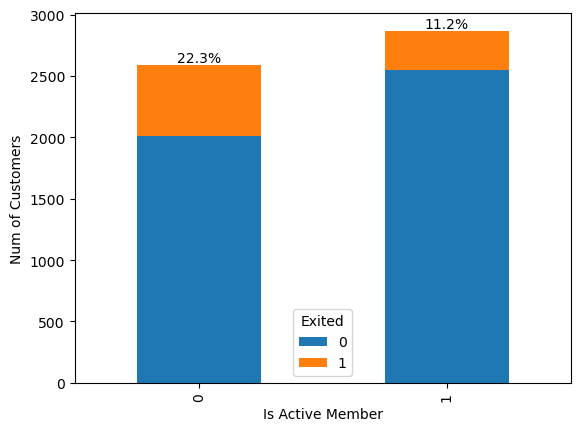

In [80]:
dfm = df[df['Gender']== 'Male'][['IsActiveMember','Exited']]

counts = dfm.groupby(['IsActiveMember', 'Exited']).size().unstack(fill_value=0)


percentage_exited = counts[1] / (counts[0] + counts[1]) * 100

# Plot the stacked bar chart
counts.plot(kind='bar', stacked=True)
plt.xlabel('Is Active Member')
plt.ylabel('Num of Customers')

# Plot the percentage values on top of the bars
for i, val in enumerate(percentage_exited):
    plt.text(i, sum(counts.iloc[i]), f'{val:.1f}%', ha='center', va='bottom')

plt.show()

In [82]:
pd.crosstab(index= df['SalaryGroup'], columns= df['Exited'])

Exited            0    1
SalaryGroup             
0-25000         975  242
25000-50000     989  247
50000-75000    1003  266
75000-100000   1030  238
100000-125000  1020  256
125000-150000  1018  261
150000-175000   941  254
175000-200000   987  273

In [89]:
gender_counts = df.groupby(['SalaryGroup', 'Gender']).size().unstack()
churn_counts = df[df['Exited'] == 1].groupby(['SalaryGroup', 'Gender']).size().unstack()

In [90]:
churn_probabilities = churn_counts.div(gender_counts)
churn_probabilities

Gender           Female      Male
SalaryGroup                      
0-25000        0.241007  0.163389
25000-50000    0.248639  0.160584
50000-75000    0.245520  0.181435
75000-100000   0.240072  0.147059
100000-125000  0.218543  0.184524
125000-150000  0.274671  0.140089
150000-175000  0.284916  0.153495
175000-200000  0.253913  0.185401

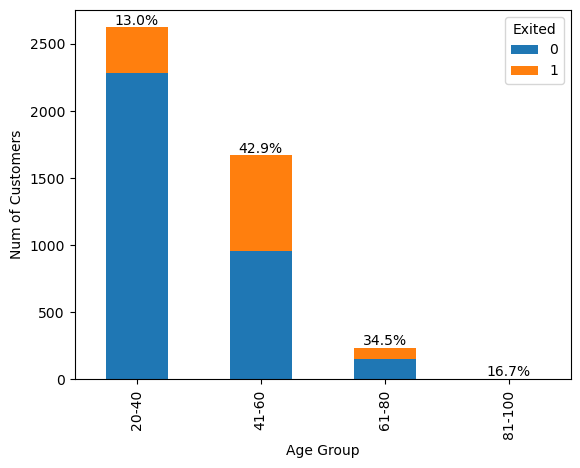

In [91]:
dff = df[df['Gender']== 'Female'][['AgeGroup','Exited']]

counts = dff.groupby(['AgeGroup', 'Exited']).size().unstack(fill_value=0)


percentage_exited = counts[1] / (counts[0] + counts[1]) * 100

# Plot the stacked bar chart

counts.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Num of Customers')

# Plot the percentage values on top of the bars
for i, val in enumerate(percentage_exited):
    plt.text(i, sum(counts.iloc[i]), f'{val:.1f}%', ha='center', va='bottom')


plt.show()

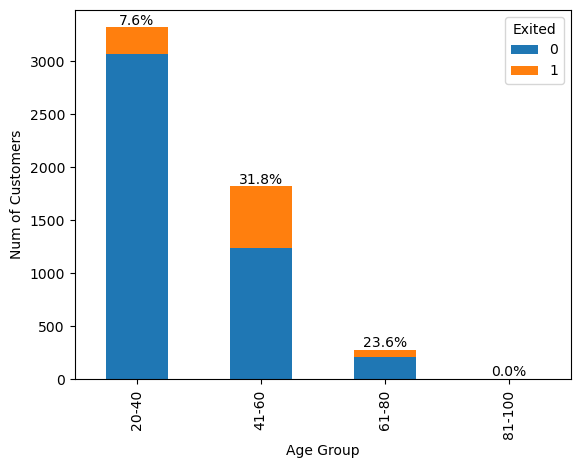

In [92]:
dfm = df[df['Gender']== 'Male'][['AgeGroup','Exited']]

counts = dfm.groupby(['AgeGroup', 'Exited']).size().unstack(fill_value=0)


percentage_exited = counts[1] / (counts[0] + counts[1]) * 100

# Plot the stacked bar chart
counts.plot(kind='bar', stacked=True)
plt.xlabel('Age Group')
plt.ylabel('Num of Customers')

# Plot the percentage values on top of the bars
for i, val in enumerate(percentage_exited):
    plt.text(i, sum(counts.iloc[i]), f'{val:.1f}%', ha='center', va='bottom')


plt.show()

In [93]:
group_counts = df.groupby(['AgeGroup', 'Gender']).size().unstack()
churn_counts = df[df['Exited'] == 1].groupby(['AgeGroup', 'Gender']).size().unstack()
churn_probabilities = churn_counts.div(group_counts)
print(churn_probabilities)

Gender      Female      Male
AgeGroup                    
20-40     0.130103  0.076274
41-60     0.428657  0.317757
61-80     0.344681  0.235507
81-100    0.166667  0.000000


In [94]:
pd.crosstab(index= df['AgeGroup'], columns= df['Gender'])

Gender    Female  Male
AgeGroup              
20-40       2621  3317
41-60       1668  1819
61-80        235   276
81-100         6     9